In [1]:
import wfdb
import neurokit2 as nk
import pandas as pd

def read_and_analyze_ecg(file_base_path, participant_index):
    """
    Reads an ECG data file using wfdb.rdsamp, cleans the signal, identifies R-peaks,
    delineates for waveform features, and performs a comprehensive analysis.

    Parameters:
    - file_base_path: str, the base path to the file without the extension.
    - participant_index: int, a unique identifier for the participant.

    Returns:
    - A tuple containing cleaned ECG data, R-peaks information, delineation results, and analysis.
    """

    # Load the signal and metadata using wfdb.rdsamp
    signal, fields = wfdb.rdsamp(file_base_path)
    # what means signal[:, 0]?

    # anno = wfdb.rdann(file_base_path, 'atr')
    # print(anno)

    ecg_signal = signal[:, 11]  # Assuming the ECG signal is the first column
    sample_rate = fields['fs']
    print(fields)

    # print(f"Sample rate: {sample_rate} Hz, Participant: {participant_index}")
    #
    # # Clean the ECG signal
    # cleaned_ecg = nk.ecg_clean(ecg_signal, sampling_rate=sample_rate)
    #
    # # Find R-peaks
    # _, rpeaks = nk.ecg_peaks(cleaned_ecg, sampling_rate=sample_rate)
    #
    # print(rpeaks)
    #
    # # Delineate the ECG signal
    # _, waves = nk.ecg_delineate(cleaned_ecg, rpeaks, sampling_rate=sample_rate, method="peak")
    #
    # # Process the entire signal to extract processed signals and related info
    # signals, info = nk.ecg_process(cleaned_ecg, sampling_rate=sample_rate)
    #
    # # Perform a comprehensive analysis
    # analysis = nk.ecg_analyze(signals, sampling_rate=sample_rate)

    cleaned_ecg = nk.ecg_clean(ecg_signal, sampling_rate=sample_rate)
    _, rpeaks = nk.ecg_peaks(cleaned_ecg, sampling_rate=sample_rate, method="nabian2018")

    # Delineate the ECG signal
    _, waves = nk.ecg_delineate(cleaned_ecg, rpeaks, sampling_rate=sample_rate, method="peak", show=True)

    signals, info = nk.ecg_process(ecg_signal, sampling_rate=sample_rate)
    nk.ecg_plot(signals, info)
    plot = nk.events_plot(rpeaks['ECG_R_Peaks'], cleaned_ecg, color='red')


    return rpeaks, waves, cleaned_ecg


{'fs': 500, 'sig_len': 8000, 'n_sig': 12, 'base_date': None, 'base_time': datetime.time(0, 0, 12), 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'comments': ['Age: 81', 'Sex: Male', 'Dx: 164889003', 'Rx: Unknown', 'Hx: Unknown', 'Sx: Unknown']}


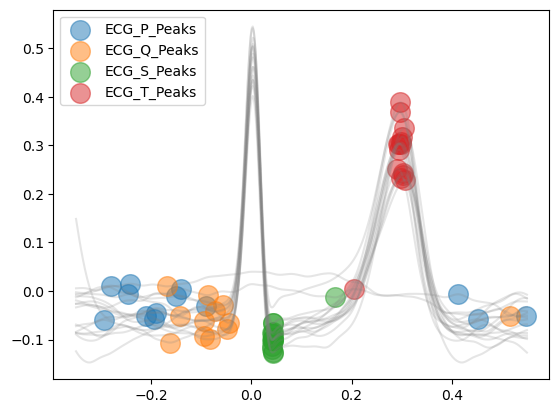

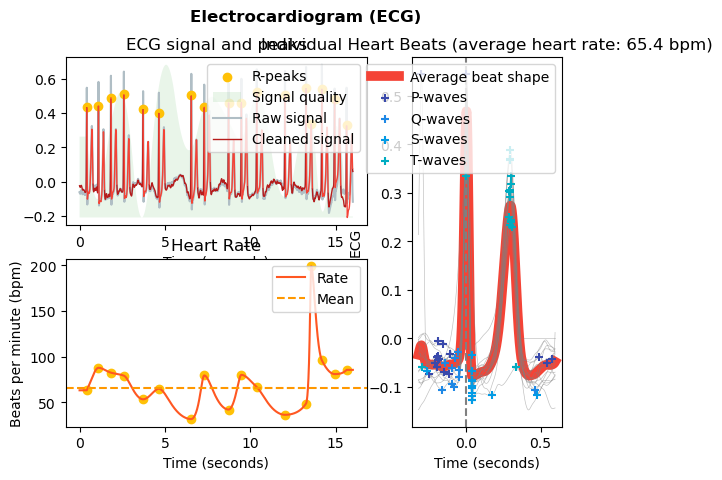

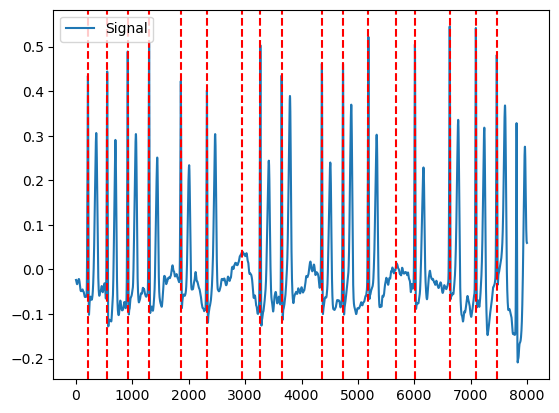

In [2]:
# Example usage
!pip install ts2vg
file_base_path = 'CPSC/A0009'  # Do not include the '.mat' extension
participant_index = 1

rpeaks, waves, cleaned_ecg = read_and_analyze_ecg(file_base_path, participant_index)

# install ts2vg
# how to do it?
#

# Now, you can further analyze the returned data or plot it using NeuroKit2's plotting functions or matplotlib.


In [3]:
rpeaks


{'method_peaks': 'nabian2018',
 'method_fixpeaks': 'None',
 'ECG_R_Peaks': array([ 210,  552,  916, 1295, 1858, 2321, 2947, 3269, 3647, 4360, 4735,
        5185, 5683, 6011, 6628, 7092, 7463]),
 'sampling_rate': 500}

In [4]:
waves

{'ECG_P_Peaks': [115,
  506,
  nan,
  nan,
  1783,
  nan,
  2826,
  3172,
  3542,
  4220,
  nan,
  nan,
  5613,
  5888,
  nan,
  6945,
  nan],
 'ECG_Q_Peaks': [162,
  529,
  nan,
  nan,
  1829,
  2273,
  2863,
  3227,
  3622,
  4323,
  nan,
  nan,
  5639,
  5940,
  nan,
  7011,
  nan],
 'ECG_S_Peaks': [230,
  573,
  937,
  1316,
  1878,
  2341,
  nan,
  3290,
  3667,
  4381,
  4756,
  5206,
  5766,
  6032,
  6649,
  7113,
  nan],
 'ECG_T_Peaks': [359,
  699,
  1062,
  1440,
  2007,
  2468,
  nan,
  3420,
  3795,
  4511,
  4883,
  5334,
  5785,
  6164,
  6780,
  7242,
  nan],
 'ECG_P_Onsets': [81,
  410,
  nan,
  nan,
  1754,
  nan,
  2794,
  3148,
  3502,
  4207,
  nan,
  nan,
  5574,
  5875,
  nan,
  6937,
  nan],
 'ECG_T_Offsets': [388,
  727,
  1089,
  1468,
  2037,
  2498,
  nan,
  3451,
  3823,
  4541,
  4912,
  5363,
  5940,
  6194,
  6812,
  7271,
  nan]}

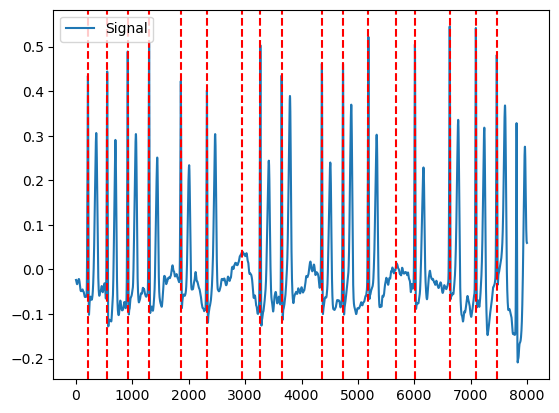

In [5]:

plot = nk.events_plot(rpeaks['ECG_R_Peaks'], cleaned_ecg, color='red')

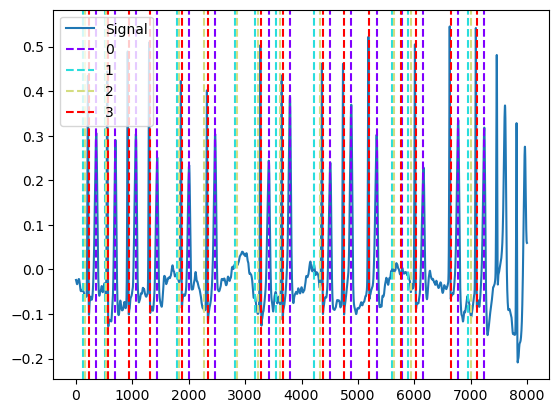

In [6]:
plot = nk.events_plot([waves['ECG_T_Peaks'], waves['ECG_P_Peaks'], waves['ECG_Q_Peaks'], waves['ECG_S_Peaks']], cleaned_ecg)

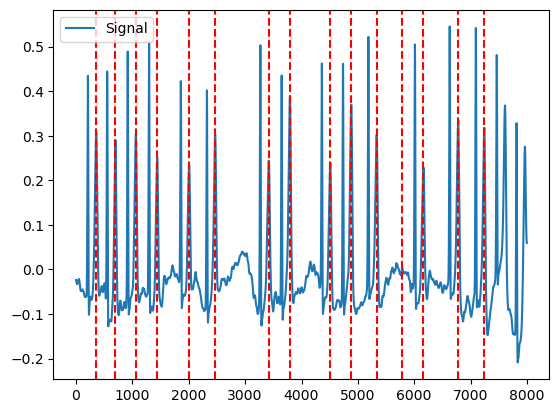

In [7]:
plot = nk.events_plot(waves['ECG_T_Peaks'], cleaned_ecg, color='red')

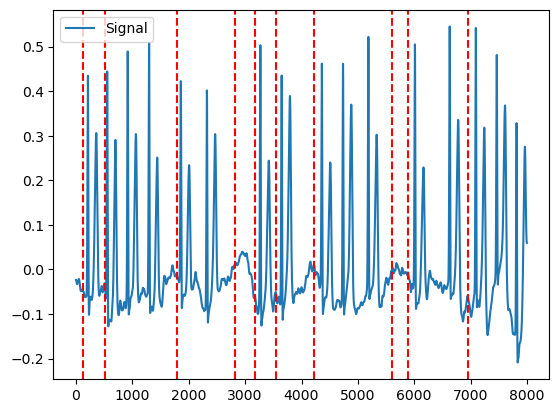

In [8]:
plot = nk.events_plot(waves['ECG_P_Peaks'], cleaned_ecg, color='red')

In [9]:
import wfdb

# Replace 'path/to/your/file' with the actual path to your .hea file, without the extension
record_name = 'only_sinus/A0002'

# Read the header file
header = wfdb.rdheader(record_name)
print(header.comments)

# Print some information about the record
print("Record name:", header.record_name)
print("Sampling frequency:", header.fs, "Hz")
print("Number of signals:", header.n_sig)
print("Signal names:", header.sig_name)
print("Data format:", header.fmt)
print("Units for each signal:", header.units)

['Age: 49', 'Sex: Female', 'Dx: 426783006', 'Rx: Unknown', 'Hx: Unknown', 'Sx: Unknown']
Record name: A0002
Sampling frequency: 500 Hz
Number of signals: 12
Signal names: ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
Data format: ['16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16']
Units for each signal: ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV']
